In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

# Study data files
complaints_metadata_path = "complaints.csv/complaints.csv"

# Read data to study results
complaints_metadata = pd.read_csv(complaints_metadata_path)

# Display table
complaints_metadata.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,78221,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250892
1,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Experian Information Solutions Inc.,TN,38016,NaN,NaN,Web,2024-12-24,In progress,Yes,NaN,11250759


In [3]:
len(complaints_metadata)

7214880

In [4]:
# Data types of columns
complaints_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214880 entries, 0 to 7214879
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 990.

In [5]:
# Drop Consumer Disputed, Tags, Consumer Complaint Narrative column
complaints_database = complaints_metadata.drop(['Consumer disputed?','Tags','Consumer complaint narrative'], axis=1)

In [6]:
# Clean header row to lower case
complaints_db = complaints_database.rename(columns=str.lower)
complaints_db.head()

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
0,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,TX,78221,NaN,Web,2024-12-24,In progress,Yes,11250892
1,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,Experian Information Solutions Inc.,TN,38016,NaN,Web,2024-12-24,In progress,Yes,11250759
2,2024-12-24,Debt collection,I do not know,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,ENCORE CAPITAL GROUP INC.,GA,31061,NaN,Web,2024-12-24,In progress,Yes,11250794
3,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MD,21212,NaN,Web,2024-12-24,In progress,Yes,11250735
4,2024-12-24,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75495,NaN,Web,2024-12-24,In progress,Yes,11250736


In [7]:
complaints_db.count()

date received                   7214880
product                         7214880
sub-product                     6979585
issue                           7214874
sub-issue                       6454834
company public response         3590786
company                         7214880
state                           7164992
zip code                        7184652
consumer consent provided?      5946854
submitted via                   7214880
date sent to company            7214880
company response to consumer    7214860
timely response?                7214880
complaint id                    7214880
dtype: int64

In [8]:
# Remove rows with null values
clean_database = complaints_db.dropna()  

In [9]:
# Number of rows in dataframe
len(clean_database)

3137716

In [10]:
# Convert Date Received and Date Sent To Company to datetime
clean_database['date received'] = pd.to_datetime(clean_database['date received'])
clean_database['date sent to company'] = pd.to_datetime(clean_database['date sent to company'])

In [11]:
# Filtered to only complaints in 2024 calender year
clean_database = clean_database[(clean_database['date received'] >= "2024-01-01") & (clean_database['date received'] <= "2024-12-31")]

In [12]:
sample_data = clean_database.sample(n=5000, random_state=1)

In [13]:
sample_data.head(4)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
1846565,2024-08-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34203,Consent not provided,Web,2024-08-15,Closed with non-monetary relief,Yes,9812181
3071081,2024-07-13,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32506,Consent not provided,Web,2024-07-13,Closed with explanation,Yes,9503664
6332019,2024-02-21,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,18042,Consent not provided,Web,2024-02-21,Closed with non-monetary relief,Yes,8387816
4151806,2024-04-04,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34957,Consent not provided,Web,2024-04-04,Closed with non-monetary relief,Yes,8685526


In [14]:
# Find number of complaints in 2024
len(sample_data)

5000

In [15]:
sample_data['timely response?'] = sample_data['timely response?'].replace({'Yes': True, 'No': False})

In [16]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1846565 to 3143459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date received                 5000 non-null   datetime64[ns]
 1   product                       5000 non-null   object        
 2   sub-product                   5000 non-null   object        
 3   issue                         5000 non-null   object        
 4   sub-issue                     5000 non-null   object        
 5   company public response       5000 non-null   object        
 6   company                       5000 non-null   object        
 7   state                         5000 non-null   object        
 8   zip code                      5000 non-null   object        
 9   consumer consent provided?    5000 non-null   object        
 10  submitted via                 5000 non-null   object        
 11  date sent to company      

In [17]:
# Convert Timely response? column to boolean
sample_data['timely response?'] = sample_data['timely response?'].astype(bool)

In [18]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1846565 to 3143459
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date received                 5000 non-null   datetime64[ns]
 1   product                       5000 non-null   object        
 2   sub-product                   5000 non-null   object        
 3   issue                         5000 non-null   object        
 4   sub-issue                     5000 non-null   object        
 5   company public response       5000 non-null   object        
 6   company                       5000 non-null   object        
 7   state                         5000 non-null   object        
 8   zip code                      5000 non-null   object        
 9   consumer consent provided?    5000 non-null   object        
 10  submitted via                 5000 non-null   object        
 11  date sent to company      

In [19]:
# Count of Complaint ID column confirms each row is a unique compaint
# when compared against the row count above.
sample_data["complaint id"].nunique()

5000

In [20]:
# Number of columns in panda dataframe
len(sample_data.columns)


15

In [21]:
# Number of companies represented in database.
number_of_companies = sample_data["company"].nunique()
number_of_companies

85

In [22]:
# States with the most complaints
states = sample_data["state"].value_counts()
states.head(10)

state
FL    701
TX    637
CA    496
GA    360
NY    329
IL    244
PA    222
NJ    197
NC    158
MD    144
Name: count, dtype: int64

In [23]:
# State column has 63 unique entries, including... 
# Armed Forces (AA), (AE), (AP), 
# American Samoa (AS), Guam (GU), Northern Mariana Islands (MP)
# Virgin Islands (VI), Minor Islands, Marshall Islands (MH)
# Micronesia (FM), Palau (PW), 
statess = sample_data["state"].value_counts()
sorted_states = statess.sort_values(ascending=True)
sorted_states.head(10)

state
AK                                      1
ID                                      1
VT                                      1
UNITED STATES MINOR OUTLYING ISLANDS    1
WY                                      2
ME                                      3
VI                                      3
NH                                      6
ND                                      6
WV                                      8
Name: count, dtype: int64

In [24]:
# Companies with the most complaints filed
company_complaints_total = sample_data["company"].value_counts()
company_complaints_total.head(20)

company
TRANSUNION INTERMEDIATE HOLDINGS, INC.                 2478
Experian Information Solutions Inc.                    2106
WELLS FARGO & COMPANY                                    54
CITIBANK, N.A.                                           51
SYNCHRONY FINANCIAL                                      34
BANK OF AMERICA, NATIONAL ASSOCIATION                    33
NAVY FEDERAL CREDIT UNION                                16
MOHELA                                                   14
BARCLAYS BANK DELAWARE                                   13
U.S. BANCORP                                             13
Shellpoint Partners, LLC                                 10
Fidelity National Information Services, Inc. (FNIS)      10
ALLY FINANCIAL INC.                                      10
CCS Financial Services, Inc.                             10
TRUIST FINANCIAL CORPORATION                              9
I.C. System, Inc.                                         9
CREDIT ACCEPTANCE CORPORATION   

In [25]:
# Over 3000 of the 4609 companies have fewer than 10 complaints filed in the database
fewest_complaints = company_complaints_total.sort_values(ascending=True)
fewest_complaints.head(10)

company
PINNACLE RECOVERY, INC.              1
The CMI Group, Inc.                  1
FIRST NATIONAL BANK OF OMAHA         1
LoanCare, LLC                        1
BROKER SOLUTIONS, INC.               1
ProCollect, Inc.                     1
Loqbox US Inc                        1
Financial Recovery Services, Inc.    1
Armstrong and Associates, Inc        1
Meridian Title  Corporation          1
Name: count, dtype: int64

In [26]:
# Different methods of complaint submissions
submissions = sample_data["submitted via"].value_counts()
submissions

submitted via
Web    5000
Name: count, dtype: int64

In [27]:
# merge_db = clean_database
# merge_db.rename(index={'Payday loan': 'Payday loan, title loan, personal loan, or advance loan'}, inplace=True)
# merge_db.head(2)

In [28]:
# Combine similar values in the product column
merge_db = sample_data
merge_db["product"]=merge_db["product"].replace({
    "Payday loan" : "Payday loan, title loan, personal loan, or advance loan",
    "Payday loan, title loan, or personal loan" : "Payday loan, title loan, personal loan, or advance loan",
    "Credit card" : "Credit card or prepaid card",
    "Prepaid card" : "Credit card or prepaid card",
    "Credit reporting or other personal consumer reports" : "Credit reporting, credit repair services, or other personal consumer reports",
    "Credit reporting" : "Credit reporting, credit repair services, or other personal consumer reports",
    "Money transfers" : "Money transfer, virtual currency, or money service",
    "Virtual currency" : "Money transfer, virtual currency, or money service"
    }) 

In [29]:
# Replace NaN value with Not Applicable in company public response column
merge_db["company public response"] = merge_db["company public response"].fillna('Not Applicable')

In [30]:
# Reconfirm length of database is same as above.
len(merge_db)

5000

In [31]:
# Preview of new merge_db
merge_db.head(2)

,date received,product,sub-product,issue,sub-issue,company public response,company,state,zip code,consumer consent provided?,submitted via,date sent to company,company response to consumer,timely response?,complaint id
1846565,2024-08-15,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34203,Consent not provided,Web,2024-08-15,Closed with non-monetary relief,True,9812181
3071081,2024-07-13,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32506,Consent not provided,Web,2024-07-13,Closed with explanation,True,9503664


In [32]:
merge_db["company public response"].value_counts().head(20)

company public response
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            4907
Company believes it acted appropriately as authorized by contract or law                                                     80
Company disputes the facts presented in the complaint                                                                         7
Company can't verify or dispute the facts in the complaint                                                                    3
Company believes the complaint provided an opportunity to answer consumer's questions                                         1
Company believes complaint caused principally by actions of third party outside the control or direction of the company       1
Company believes complaint is the result of an isolated error                                                                 1
Name: count, dtype: int64

In [33]:
# Different complain outcomes
outcomes = merge_db["company response to consumer"].value_counts()
outcomes

company response to consumer
Closed with non-monetary relief    2659
Closed with explanation            2307
Closed with monetary relief          34
Name: count, dtype: int64

In [34]:
# Timely response column
timely = merge_db["timely response?"].value_counts()
timely

timely response?
True     4993
False       7
Name: count, dtype: int64

In [35]:
# Customed consent column. Possible ethical issue.
ethical = merge_db["consumer consent provided?"].value_counts()
ethical

consumer consent provided?
Consent not provided    3304
Consent provided        1479
Other                    212
Consent withdrawn          5
Name: count, dtype: int64

In [36]:
ethicals = merge_db["company response to consumer"].value_counts()
ethicals

company response to consumer
Closed with non-monetary relief    2659
Closed with explanation            2307
Closed with monetary relief          34
Name: count, dtype: int64

In [37]:
merge_db["product"].value_counts()

product
Credit reporting, credit repair services, or other personal consumer reports    4585
Debt collection                                                                  166
Credit card or prepaid card                                                      115
Checking or savings account                                                       76
Mortgage                                                                          32
Student loan                                                                      13
Vehicle loan or lease                                                             13
Name: count, dtype: int64

In [38]:
merge_db["issue"].value_counts()

issue
Incorrect information on your report                               2226
Improper use of your report                                        1430
Problem with a company's investigation into an existing problem     932
Written notification about debt                                      74
Attempts to collect debt not owed                                    67
Managing an account                                                  39
Credit monitoring or identity theft protection services              27
Problem with a purchase shown on your statement                      25
Getting a credit card                                                16
Trouble during payment process                                       14
Other features, terms, or problems                                   12
Closing an account                                                   12
Opening an account                                                   12
Problem with a lender or other company charging your accou

In [39]:
# Load the zip code to coordinates dataset
us_states = pd.read_csv('Resources/state_names.csv')   # Ensure it has columns 'zip_code', 'latitude', 'longitude'

# Merge the datasets on zip code
merged_data = merge_db.merge(us_states, how='left', left_on='state', right_on='Alpha code')

In [40]:
merged_data = merged_data.drop(['Code', 'Abbreviation', 'Alpha code'], axis=1)

In [41]:
merged_data.rename(columns={'State': "state_name"}, inplace=True)

In [42]:
merged_data.to_csv("Resources/sample_complaints", index=False, header=True)

In [43]:
merged_data.to_json('Resources/sample_complaints.json', orient='records', lines=False)

# How are Complaints Dispersed Across the Calendar Year 2024?

In [44]:
#Extract month as three-letter abbreviation
merge_db['month']=merge_db['date received'].dt.strftime('%b')

In [45]:
#Grouping the months 
monthly_complaints = merge_db.groupby(merge_db['month'])

In [46]:
#Getting the numbers of complaints per month
number_of_complaints = monthly_complaints.size()
number_of_complaints

month
Apr    423
Aug    560
Dec     18
Feb    341
Jan    287
Jul    546
Jun    466
Mar    389
May    434
Nov    279
Oct    685
Sep    572
dtype: int64

In [47]:
#Calculating the average of the entire year
avg_number_of_complaints = number_of_complaints.mean()

In [48]:
#Calculating the standard deviation of the entire year
std_dev_complaints = number_of_complaints.std()

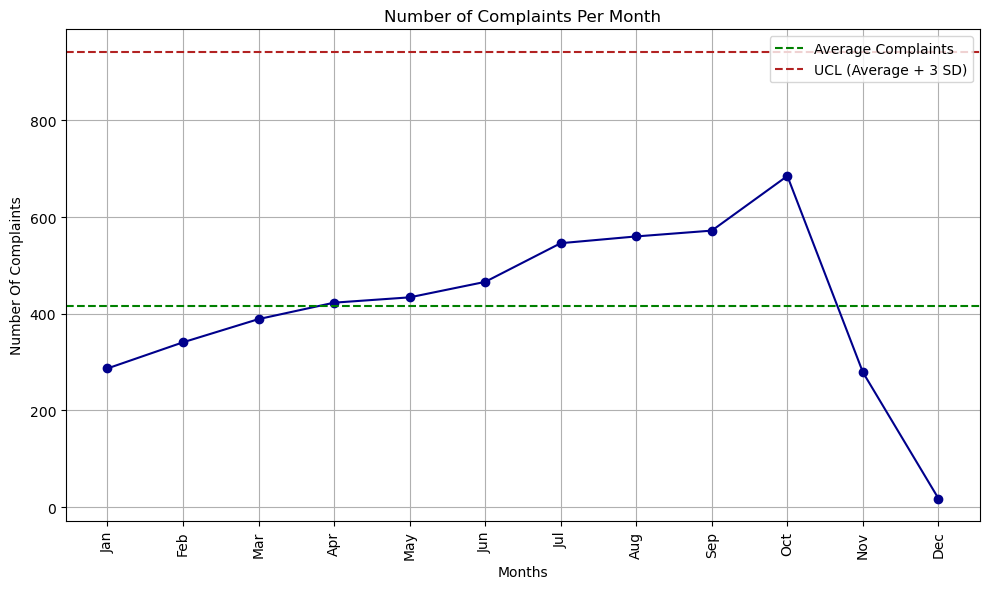

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# Set the Month column as the index
number_of_complaints = number_of_complaints.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Calculate Upper Control Limit
UCL = avg_number_of_complaints + (3 * std_dev_complaints)

# Plotting the line graph
number_of_complaints.plot(kind='line', color='darkblue', marker='o',title='Number of Complaints Per Month')

# Set x-ticks to display every month
plt.xticks(ticks=range(len(number_of_complaints.index)), labels=number_of_complaints.index, rotation=90)

# Add a horizontal line for the average
plt.axhline(y=avg_number_of_complaints, color='green', linestyle='--', label='Average Complaints')

# Add a horizontal line for the UCL
plt.axhline(y=UCL, color='firebrick', linestyle='--', label='UCL (Average + 3 SD)')

# Set labels and position the legend
plt.xlabel('Months')
plt.ylabel('Number Of Complaints')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

# Add a grid 
plt.grid(True)

#Saving the chart
plt.savefig("Resources/Number Of Complaints Per Month")

#Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()

